In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

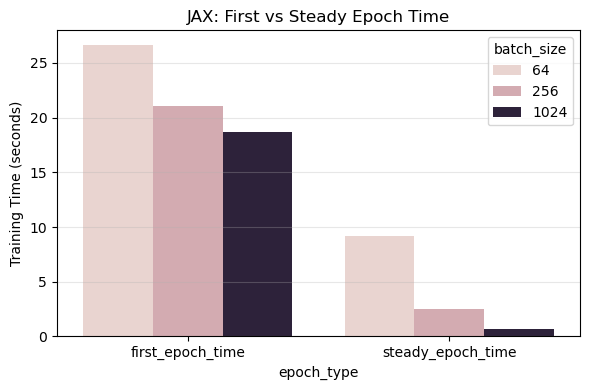

In [ ]:
df = pd.read_csv("results/summary.csv")

if "steady_epoch_time_s" not in df.columns and "steady_epoch_time" in df.columns:
    df = df.rename(columns={"steady_epoch_time": "steady_epoch_time_s"})


df_long = df.melt(
    id_vars=["batch_size"],
    value_vars=["first_epoch_time_s", "steady_epoch_time_s"],
    var_name="epoch_type",
    value_name="time_s"
)

# Clean labels
df_long["epoch_type"] = df_long["epoch_type"].map({
    "first_epoch_time_s": "first_epoch_time",
    "steady_epoch_time_s": "steady_epoch_time"
})

plt.figure(figsize=(6,4))
sns.barplot(
    data=df_long,
    x="epoch_type",
    y="time_s",
    hue="batch_size"
)

plt.ylabel("Training Time (seconds)")
plt.title("JAX: First vs Steady Epoch Time")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("viz/jax_first_vs_steady.png", dpi=200)
plt.show()

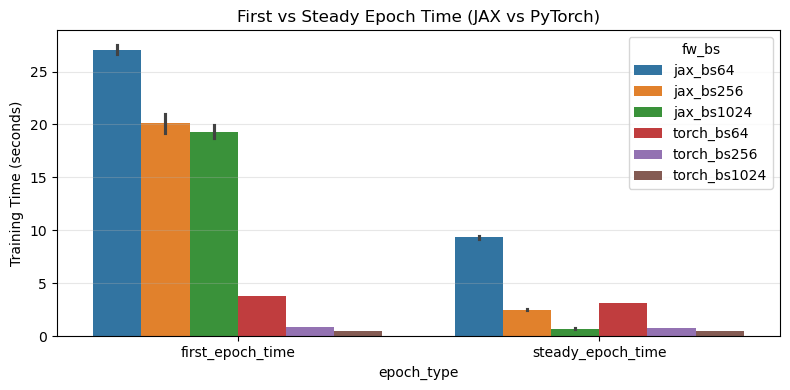

In [6]:
df = pd.read_csv("results/summary.csv")

# normalize column name
if "steady_epoch_time_s" not in df.columns and "steady_epoch_time" in df.columns:
    df = df.rename(columns={"steady_epoch_time": "steady_epoch_time_s"})

# wide -> long
df_long = df.melt(
    id_vars=["framework", "batch_size"],
    value_vars=["first_epoch_time_s", "steady_epoch_time_s"],
    var_name="epoch_type",
    value_name="time_s"
)

df_long["epoch_type"] = df_long["epoch_type"].map({
    "first_epoch_time_s": "first_epoch_time",
    "steady_epoch_time_s": "steady_epoch_time",
})

# combined hue key
df_long["fw_bs"] = df_long["framework"] + "_bs" + df_long["batch_size"].astype(str)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_long,
    x="epoch_type",
    y="time_s",
    hue="fw_bs"
)

plt.ylabel("Training Time (seconds)")
plt.title("First vs Steady Epoch Time (JAX vs PyTorch)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("viz/first_vs_steady_jax_vs_torch.png", dpi=200)
plt.show()
